In [ ]:
from fastai.vision.all import *

**Load the MNIST dataset**   
This downloads a smaller version of the MNIST dataset for quick experimentation.

In [4]:
path = untar_data(URLs.MNIST_SAMPLE)
path.ls()

(#3) [Path('/Users/woo/.fastai/data/mnist_sample/valid'),Path('/Users/woo/.fastai/data/mnist_sample/labels.csv'),Path('/Users/woo/.fastai/data/mnist_sample/train')]

**Define the DataBlock**  
The `DataBlock` organizes the dataset into a format the model can use, splitting it into training and validation sets.

In [9]:
# Create a DataBlock to manage the dataset
dblock = DataBlock(
    blocks=(ImageBlock(cls=PILImageBW), CategoryBlock),
    get_items=get_image_files,
    splitter=GrandparentSplitter(train_name='train', valid_name='valid'),
    get_y=parent_label,
    item_tfms=Resize(28)
)

dls = dblock.dataloaders(path)

**Visualize the Data**  
This displays a grid of images from the dataset, helping you confirm that the data is loaded correctly.

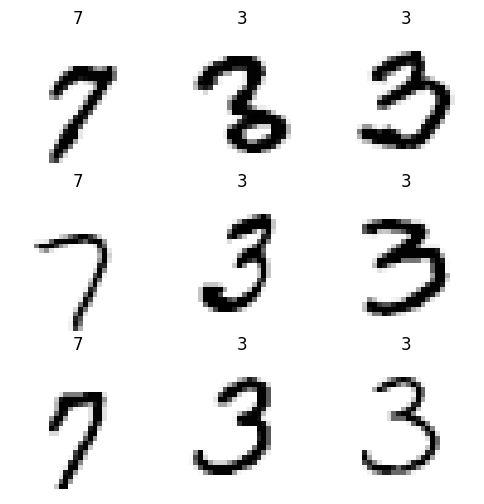

In [8]:
dls.show_batch(max_n=9, figsize=(6,6))

**Train the Model**  
This trains the model on the MNIST dataset. Fast.ai uses transfer learning, leveraging a pretrained ResNet18.

In [11]:
# Create a learner with a pretrained ResNet18 model
learn = vision_learner(dls, resnet18, metrics=accuracy)

# Fine tune the model for 1 epoch
learn.fine_tune(1)

Downloading: "https://download.pytorch.org/models/resnet18-f37072fd.pth" to /Users/woo/.cache/torch/hub/checkpoints/resnet18-f37072fd.pth

00%|██████████████████████████████████████████████████████████████████████| 44.7M/44.7M [00:00<00:00, 61.0MB/s]

epoch,train_loss,valid_loss,accuracy,time
0,0.286700,0.173422,0.940628,00:24


epoch,train_loss,valid_loss,accuracy,time
0,0.063775,0.030587,0.991659,00:22


**Evaluate the Model**

In [12]:
# Evaluate model accuracy on the validation set
learn.validate()

(#2) [0.03058665618300438,0.9916585087776184]

**Export the Model**  
This saves the trained model in a format ready for deployment.

In [15]:
learn.export('../src/model/mnist_model.pk1')